In [8]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from st_nn import NN4PDE
from boundary import BC

nn1 = NN4PDE(BC)

xs = np.linspace(0, 1, 10)
zs = np.linspace(0, 1, 10)

pts = np.dstack([np.tile(xs, len(zs)), np.repeat(xs, len(zs))])[0]
nn1.train(pts, EPOCHS=50)

  2%|▏         | 1/50 [00:05<04:16,  5.23s/it]

Epoch: 0, cost: 845.4274180630625


 22%|██▏       | 11/50 [00:57<03:23,  5.21s/it]

Epoch: 10, cost: 845.4160405430616


 42%|████▏     | 21/50 [01:48<02:30,  5.18s/it]

Epoch: 20, cost: 845.4114037950318


 62%|██████▏   | 31/50 [02:40<01:39,  5.22s/it]

Epoch: 30, cost: 845.4099711100353


 82%|████████▏ | 41/50 [03:33<00:47,  5.29s/it]

Epoch: 40, cost: 845.4108279993317


100%|██████████| 50/50 [04:20<00:00,  5.22s/it]

Epoch: 49, Final cost: 845.4099543207604


In [12]:
with open("nn_weights.txt", "w") as f:
    # Writing data to a file
    f.write(f"1 layer, {nn1.hidden} hidden cells, {nn1.epochs} epochs\n")
    f.write(str(nn1.params))

nn1.params

array([ 6.42805439e-01, -5.35817964e-01, -1.03293452e+00,  4.45912923e-01,
       -2.34722082e-01, -2.33309546e+00, -6.03887517e-01, -4.33633395e-01,
        1.74820679e+00, -1.41196517e+00, -1.79446571e+00,  5.60134139e-01,
        4.95556806e-03,  4.67086023e-01,  1.62864383e+00, -4.32386593e-01,
       -7.55901673e-01, -1.62356528e+00, -1.01075406e+00, -1.37738862e+00,
        5.24560929e-01,  8.83945692e-02,  2.35353751e-01, -3.81644585e-01,
       -1.63158444e-05, -2.03527821e+00,  3.43684181e-01, -6.95065760e-02,
        5.72569936e-01,  7.47225394e-02, -4.63502388e-01, -2.35904620e-01,
       -3.84291324e-01,  2.13224657e-01,  6.56746440e-01,  1.62111124e-01,
        2.31094582e+00,  1.60518787e-01,  1.77080354e+00,  1.45289043e+00,
        2.11116853e+00])

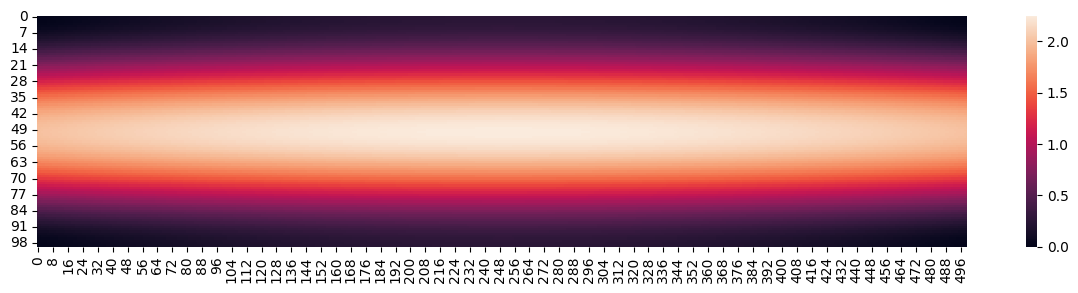

In [15]:
len_x = 500
len_z = 100

pts_many = np.empty((len_x, len_z), dtype=tuple)

for i in range(len_x):
    for j in range(len_z):
        pts_many[i][j] = (i/len_x, j/len_z)


ps = nn1.eval(pts_many)


plt.figure(figsize=(15,3))
sns.heatmap(ps.T)
plt.show()

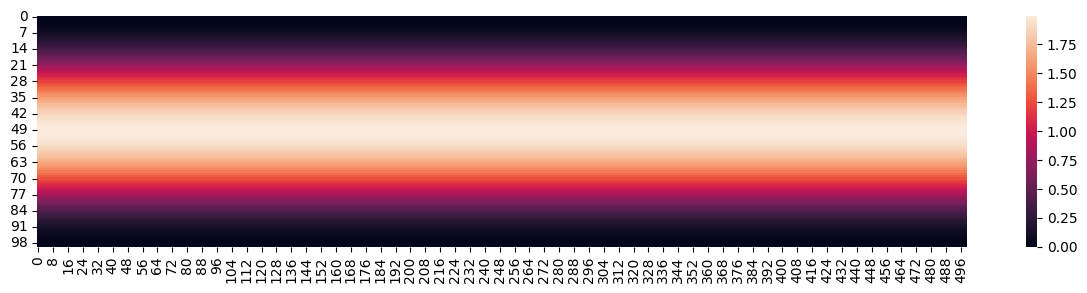

In [16]:
from jacobi import Grid
from constants import *
from boundary import p_l, p_r

grid = Grid(lambda z: p_l(z/D), lambda z: p_r(z/D), n=500, m=100)

plt.figure(figsize=(15,3))
sns.heatmap(grid.p.T)
plt.show()

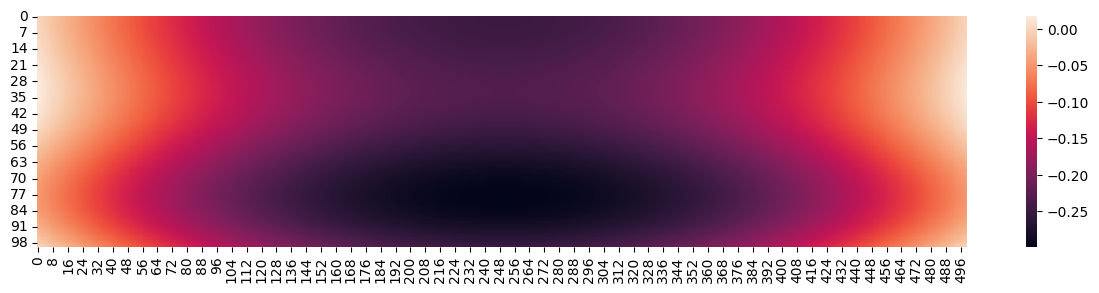

In [17]:
plt.figure(figsize=(15,3))
sns.heatmap(grid.p.T - ps.T)
plt.show()